# Notebook to conduct EDA on EPA - Expected Points

In [92]:
import pandas as pd
import os
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# set data directiory and get list of files there
data_dir = '../data/raw/'
data_files = os.listdir(data_dir)

In [58]:
# params for file read

week_cols = ['time','']

In [59]:
# read the data

# read and union the tracking data
week_df_list = []
r = re.compile("week")
for file in list(filter(r.match, data_files)):
    df_file = pd.read_csv(data_dir + file, parse_dates = ['time'], nrows = 1000)
    df_file['source_file'] = file
    week_df_list.append(df_file)

# combine all files in df list
weeks = pd.concat(week_df_list)
    

# read in the games data
games = pd.read_csv(data_dir + 'games.csv')

# read in the players data
players = pd.read_csv(data_dir + 'players.csv')

# read in the plays data
plays = pd.read_csv(data_dir + 'plays.csv')


In [60]:
plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


<AxesSubplot:>

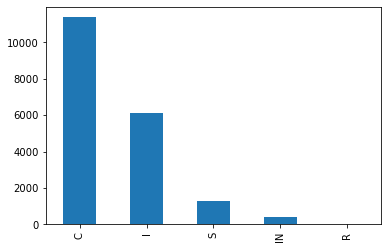

In [61]:
plays['passResult'].value_counts().plot.bar()

<AxesSubplot:xlabel='passResult'>

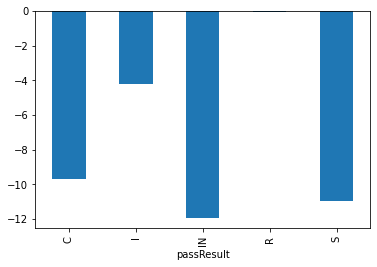

In [54]:
plays.groupby('passResult')['epa'].min().plot.bar()

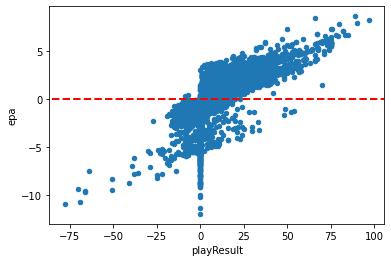

In [65]:
ax = plays.plot.scatter(x = 'playResult', y = 'epa')
ax.axhline(y=0, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)

<AxesSubplot:xlabel='numberOfPassRushers'>

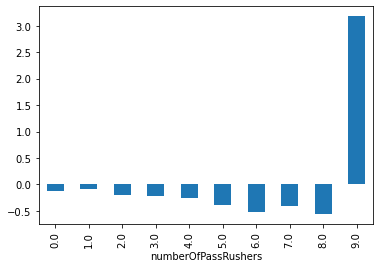

In [89]:

#plays[plays['yardlineSide'] == plays ['possessionTeam']].groupby('defendersInTheBox')['epa'].median().plot.bar()
#plays[plays['yardlineSide'] == plays ['possessionTeam']].groupby('numberOfPassRushers')['epa'].median().plot.bar()


/Users/BenjaminHarlander/opt/anaconda3/envs/NFL/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


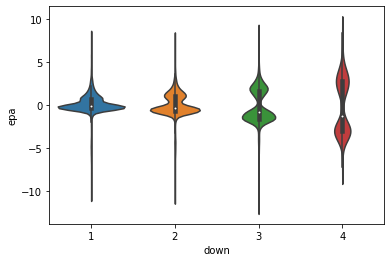

In [101]:
fontsize = 10

fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('down','epa', data=plays, ax = axes)
#axes.set_title('Day Ahead Market')

plt.show()